# Assignment #2 - Classification

<font color="red"> <b> Due: Oct 15 (Tuesday) 11:00 pm </b> </font>

<font color="blue"> **Kruti Raval** </font>

# I. Introduction

The main objective of this assignment is to gain proper understanding and solve classification problems using different algorithms, as a part of supervised learning. In machine learning, classification is the problem of identifying where the new observations belong in a set of categories, on the basis of a training set of data containing observations whose category is known.

The purpose of this assignment is to identify the machine learning algorithm that is best-suited for the classification problem at hand, thus comparing different algorithms and selecting the best performing out of all. The main focus is on prediction accuracy and good generalization performance, such that the model maximizes its prediction accuracy. In this process we would consider mainly 4 different algorithms to solve the classification problem such as :

1. Pocket Algorithm
2. Quadratic Discriminant Analysis (QDA)
3. Linear Discriminant Analysis (LDA)
4. Logistic Regression

Using these four classification algorithms, we can check the performance and determine the efficiency of each algorithm and also compare it's performance with the other. 
We will also understand and use the classification measures like Accuracy, Confusion Matrix, Precision, Recall, Specificity and so on to measure the accuracy and precision of the classification model.

# II. Data


## Description

The dataset named **Online Shoppers Purchasing Intention** is used for classification which has 12,330 samples and 18 feature values. From the dataset, we can infer that out of total instances, 10,422 were negative class samples that did not end with shopping, and the rest 1908 were positive class samples that ended with shopping. The dataset consists of 10 numerical and 8 categorical attributes. Number of different types of pages visited by the visitor in that session and total amount of time spent in each of these page categories are represented by the attributes "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration". The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

### Source

1. C. Okan Sakar 
Department of Computer Engineering, Faculty of 
Engineering and Natural Sciences, Bahcesehir University, 
34349 Besiktas, Istanbul, Turkey 

2. Yomi Kastro 
Inveon Information Technologies Consultancy and Trade, 
34335 Istanbul, Turkey

In [26]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import math
%matplotlib inline

In [27]:
#Reading the data
dfClass = pd.read_csv("online_shoppers_intention.csv")
dfClass

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.00,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.000000,0,0.00,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.000000,0,0.00,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.000000,0,0.00,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.000000,0,0.00,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.000000,0,0.00,19,154.216667,0.015789,0.024561,0.000000,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.000000,0,0.00,1,0.000000,0.200000,0.200000,0.000000,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.000000,0,0.00,0,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.000000,0,0.00,2,37.000000,0.000000,0.100000,0.000000,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.000000,0,0.00,3,738.000000,0.000000,0.022222,0.000000,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


### Preprocessing the Data

Checking for the null values in the dataset and taking necessary actions for the same.

In [28]:
#Checking null values
dfClass.any().isnull()

Administrative             False
Administrative_Duration    False
Informational              False
Informational_Duration     False
ProductRelated             False
ProductRelated_Duration    False
BounceRates                False
ExitRates                  False
PageValues                 False
SpecialDay                 False
Month                      False
OperatingSystems           False
Browser                    False
Region                     False
TrafficType                False
VisitorType                False
Weekend                    False
Revenue                    False
dtype: bool

#### Data Cleaning
There are no null or missing values in the data set. If there were any, we could either remove the entire instance with null values or replace the null value with the mean of that attribute to clean the data.

In [29]:
#Getting information of the data
dfClass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

In [30]:
dfClass.shape

(12330, 18)

In [31]:
# Data and value description
dfClass.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


#### Data Validation

In order to plot the data values and get relation from it, we need numeric data type. For the non-numeric attributes like Month, VisitorType, Weekend and Revenue, we need to convert it so that plotting the data and inferring relation from it becomes easier when we visualise the data.

In [32]:
dfClass['VisitorType'].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

In [33]:
dfClass['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [34]:
dfClass['Weekend'].unique()

array([False,  True])

In [35]:
dfClass['Revenue'].unique()

array([False,  True])

In [36]:
dfClass=dfClass.drop(columns=['VisitorType','Administrative_Duration','ProductRelated_Duration','Informational_Duration','Weekend','Month','PageValues','OperatingSystems','Browser','Region','SpecialDay','VisitorType'])
cf_dataframe = pd.get_dummies(dfClass)
cf_dataframe

,Administrative,Informational,ProductRelated,BounceRates,ExitRates,TrafficType,Revenue
0,0,0,1,0.200000,0.200000,1,False
1,0,0,2,0.000000,0.100000,2,False
2,0,0,1,0.200000,0.200000,3,False
3,0,0,2,0.050000,0.140000,4,False
4,0,0,10,0.020000,0.050000,4,False
5,0,0,19,0.015789,0.024561,3,False
6,0,0,1,0.200000,0.200000,3,False
7,1,0,0,0.200000,0.200000,5,False
8,0,0,2,0.000000,0.100000,3,False
9,0,0,3,0.000000,0.022222,2,False


In [37]:
label_encoder = LabelEncoder()
dfClass['Revenue'] = label_encoder.fit_transform(dfClass['Revenue'])
dfClass['Revenue'].value_counts()
revenue_val = {True: 1, False: 0}
cf_dataframe['Revenue'] = cf_dataframe['Revenue'].apply(lambda x: revenue_val[x])
dfClass['Revenue'] = dfClass['Revenue'].apply(lambda x: revenue_val[x])

In [38]:
cf_dataframe.head()

,Administrative,Informational,ProductRelated,BounceRates,ExitRates,TrafficType,Revenue
0,0,0,1,0.20,0.20,1,0
1,0,0,2,0.00,0.10,2,0
2,0,0,1,0.20,0.20,3,0
3,0,0,2,0.05,0.14,4,0
4,0,0,10,0.02,0.05,4,0


In [39]:
X = cf_dataframe
T = dfClass['Revenue']

print("X (Input) has shape of:", X.shape)
print("T (Target) has shape of:", T.shape)
X.head()

X (Input) has shape of: (12330, 7)
T (Target) has shape of: (12330,)


,Administrative,Informational,ProductRelated,BounceRates,ExitRates,TrafficType,Revenue
0,0,0,1,0.20,0.20,1,0
1,0,0,2,0.00,0.10,2,0
2,0,0,1,0.20,0.20,3,0
3,0,0,2,0.05,0.14,4,0
4,0,0,10,0.02,0.05,4,0


## Plots for understanding the classification data

It is the graphical representation of data. It involves producing images that communicate relationships among the represented data to viewers of the images. This is achieved via mapping between graphic marks and data values for visualization.

##### Pairplot
plots pairwise relationships in the data. A grid of Axes will be created such that each variable in data will be shared in the y-axis across a single row and in the x-axis across a single column. The diagonal axes shows the uninvariate distribution for variable in that column.<br/>
data - dataframe<br/>
hue - map plots aspects in different color for identification<br/>
palette - set of colors for mapping hue variables

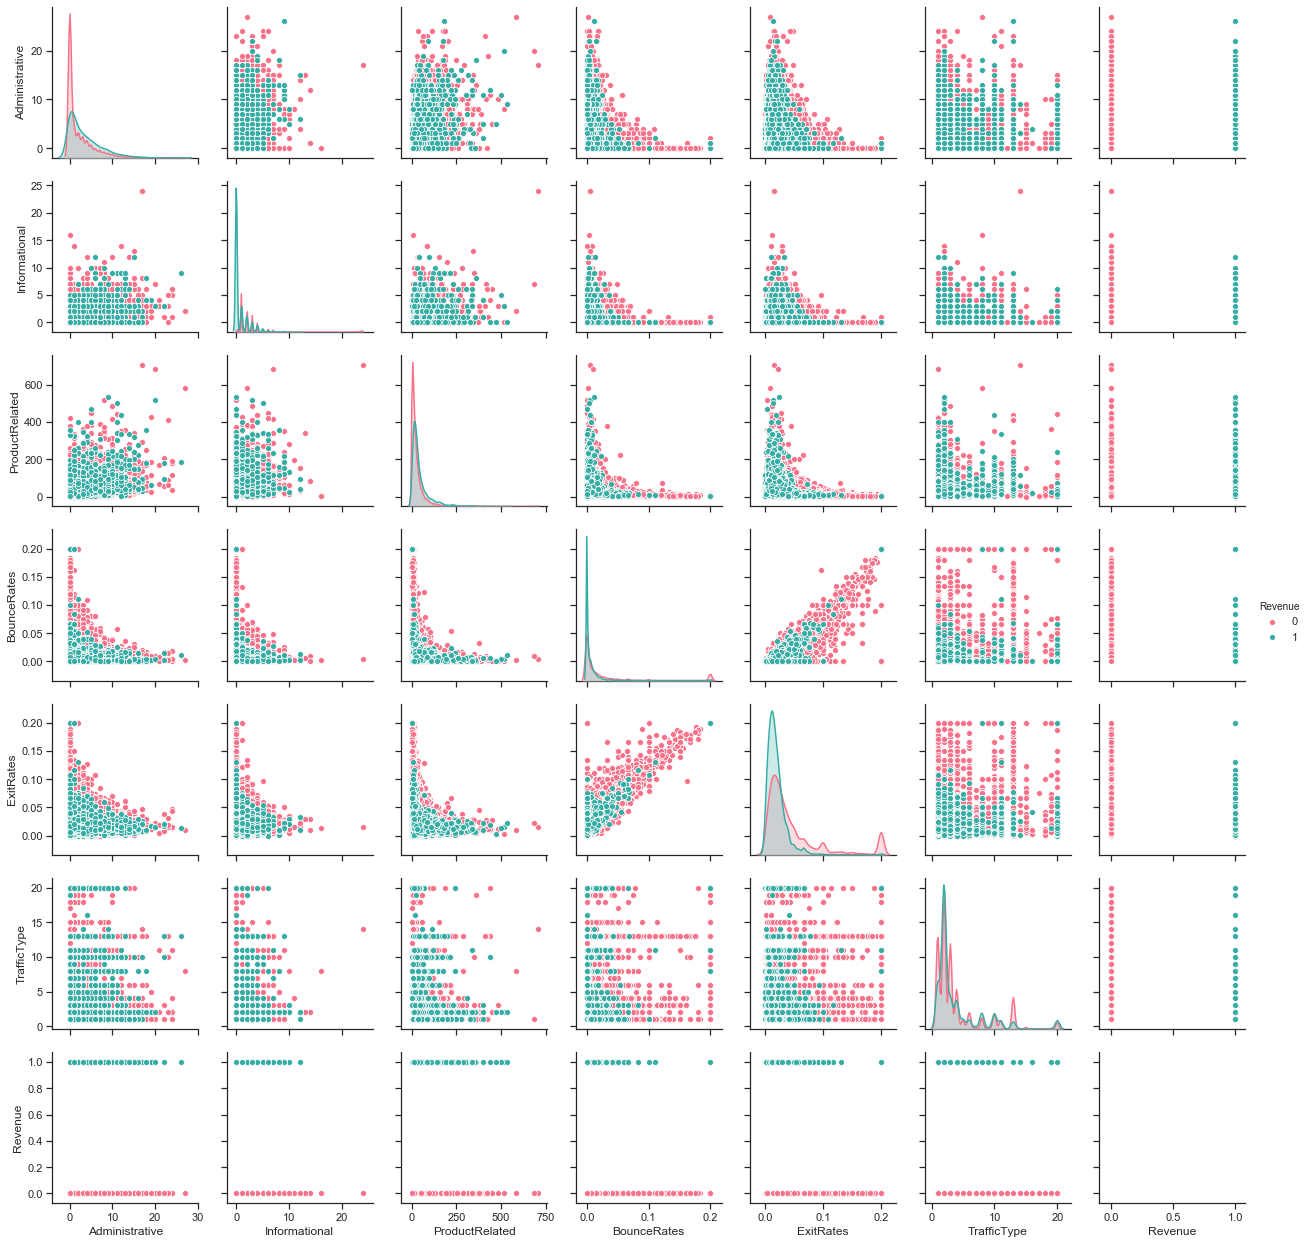

In [40]:
sns.set(style="ticks", color_codes=True)
graph = sns.pairplot(dfClass, hue='Revenue', palette = 'husl')

##### Barplot
A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle and provides some indication of the uncertainty around that estimate using error bars. Bar plots include 0 in the quantitative axis range, and they are a good choice when 0 is a meaningful value for the quantitative variable, and you want to make comparisons against it.

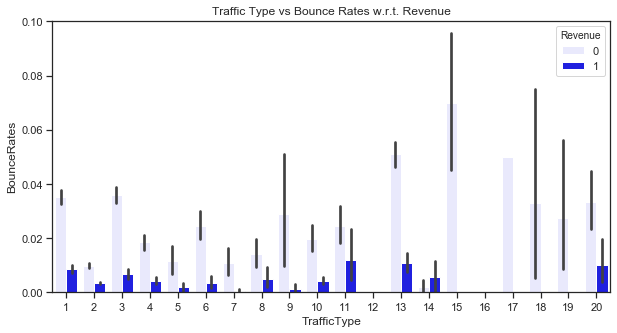

In [41]:
plt.rcParams['figure.figsize'] = (10,5)
sns.barplot(x = dfClass['TrafficType'], y = dfClass['BounceRates'], hue = dfClass['Revenue'], color="blue")
plt.title('Traffic Type vs Bounce Rates w.r.t. Revenue', fontsize = 12)
plt.show()

##### Distplot

It plots unvariate distribution of observations.

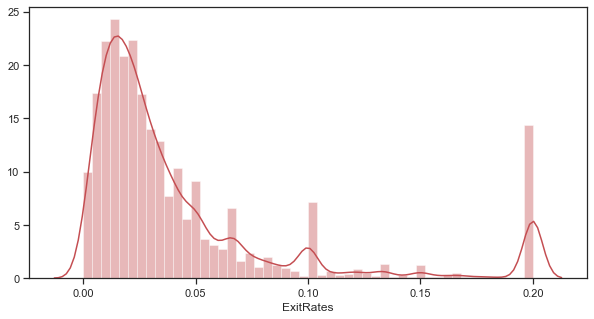

In [42]:
sns.distplot(dfClass['ExitRates'],color='r')

##### Heatmap

It is graphical representation of data using color code and color intensity system. It represents the correlation of the feature values in the data.

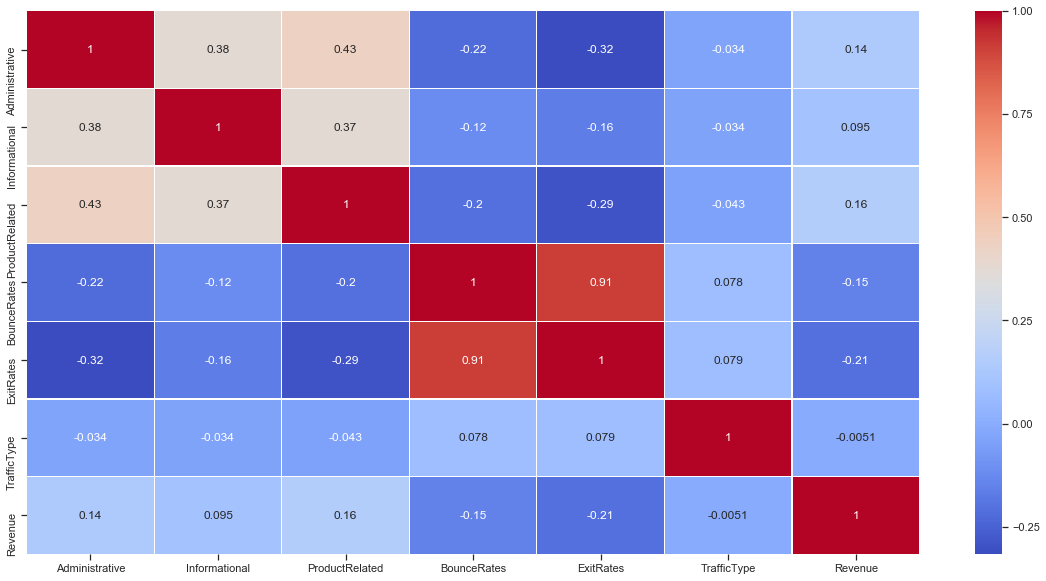

In [43]:
plt.figure(figsize=(20,10))
sns.heatmap(dfClass.corr(),annot=True, lineWidth = 0.25, cmap='coolwarm')

## Preliminary Observation

**Pairplot**: Distribution of single variables as well as relation between two variables is described through this graph. From the graph we can see that all the attributes are mapped to one another showing relation to eachother. As we have changed the value of revenue, weekend from object to numeric values 0 and 1, it's relation to other attributes reflects in that region only.

**Barplot**: The graph shows distribution revenue for the attributes Traffic Type and Bounce Rates. It is used as we want to compare revenue generated according to the Traffic Type and Bounce rates so we can predict the future revenue accurately based on the data.

**Distplot**: Distribution of a random variable is shown through this Distplot graph. Here the exit rates distribution is shown among its range of different values. It also shows the maximum and minimum density of exit rates in that particular area. The maximum density is between the values 0 to 0.05, where the exit rates are maximum.

**Heatmap**: From intensity of colors and the corresponding values between the attributes, we can know the co-relation among each variable. The diagonal shows mapping of each variable with itself and so the value is 1 i.e maximum correlation. Bounce rates and Exit rates have the maximum correlation (0.91) and Administrative and exit rates have the minimum correlation (-0.32) between them as we can see from the graph.

# III. Method

Summary of the pocket algorithm, QDA, LDA, and logistic regression is presented below along with the explaination and implementation of its code.


### Partitioning the Datasets


In [44]:
# now partition the data 

""" partitioning data

    parameters
    -----------
    X        pd.DataFrame
             input data to partition
    T        pd.DataFrame
             target labels to partition
    raito    list
             list of ratios for partitions (should be summed to 1) 
             the number of return pairs are different
"""
def partition(X, T, ratio=[0.8, 0.2]): 
    
    assert(np.sum(ratio) == 1)
    
    # shuffle the data indices 
    idxs = np.random.permutation(X.index)
    
    # the number of samples 
    N = X.shape[0]
    
    Xs = []
    Ts = []
    i = 0  # first index to zero
    for k, r in enumerate(ratio):
        nrows = int(round(N * r))  # number of rows
        
        if k == len(ratio) -1:
            Xs.append(X.iloc[i:, :])
            Ts.append(T.iloc[i:, :])
        else:
            Xs.append(X.iloc[i:i+nrows, :])
            Ts.append(T.iloc[i:i+nrows, :])
        
        i += nrows
    
    return Xs, Ts

In [45]:
X_data = dfClass.iloc[:,0:6]
T_label = dfClass.iloc[:,6:]

split_feature, split_label = partition(X_data, T_label)
X_train, X_test = [i.values for i in split_feature]
y_train, y_test = [j.values for j in split_label]
print("Training data shape: ",X_train.shape,"\nTesting label shape: ",y_train.shape,"\nTraining data shape: ",X_test.shape,"\nTesting label shape:",y_test.shape)
print("Xtrain: ",X_train)
print("y_train: ",y_train)
print("Xtrain: ",X_test)
print("y_train: ",y_test)

Training data shape:  (9864, 6) 
Testing label shape:  (9864, 1) 
Training data shape:  (2466, 6) 
Testing label shape: (2466, 1)
Xtrain:  [[0.0000000e+00 0.0000000e+00 1.0000000e+00 2.0000000e-01 2.0000000e-01
  1.0000000e+00]
 [0.0000000e+00 0.0000000e+00 2.0000000e+00 0.0000000e+00 1.0000000e-01
  2.0000000e+00]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 2.0000000e-01 2.0000000e-01
  3.0000000e+00]
 ...
 [0.0000000e+00 0.0000000e+00 5.0000000e+00 1.2000000e-01 1.6000000e-01
  3.0000000e+00]
 [2.0000000e+00 1.0000000e+00 2.0000000e+01 1.7391304e-02 2.3671498e-02
  2.0000000e+00]
 [4.0000000e+00 1.0000000e+00 5.0000000e+00 0.0000000e+00 1.4814815e-02
  3.0000000e+00]]
y_train:  [[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
Xtrain:  [[0.0000000e+00 0.0000000e+00 1.0000000e+00 2.0000000e-01 2.0000000e-01
  1.0000000e+00]
 [1.0000000e+00 0.0000000e+00 2.2000000e+01 0.0000000e+00 1.5000000e-02
  1.0000000e+01]
 [0.0000000e+00 0.0000000e+00 7.0000000e+00 2.8571429e-02 3.4285714e-02
  2.0000000e+00]

## Summary of Classification Models

### Pocket Algorithm 

Pocket algorithm is based on Perceptron algorithm. It solves the stability problem of perceptron learning by keeping the best solution seen so far "in its pocket". In classification problem, weights are updated over every iteration so it is possible that a good weight was being replaced. When the data is not linearly separable, there is no guarantee on convergence. Also, the algorithm selects an arbitrary hyperplane that divides two classes, so it is possible to discover a decision boundary that is not the best. So to overcome this, pocket algorithm is used which keeps the best known weight so far in its pocket. 

$$
w^{(k+1)} = w^{(k)} + \alpha t_i x_i
$$

Here α is learning rate

Considering the above equation, the pocket algorithm stores the best value after iterating through each and evry step and keeping in pocket the best solution.

### Quadratic Discriminant Analysis (QDA)

We can calculate the posterior and prior probabilities here and define the decision boundry in this case. The data generally follows Gaussian Distribution; for this approach, the means, covariances and prior probabilities. The probability that one instance belongs to a class is calculated by considering the mean, covariance and prior probability for the target.

we can define the discriminant function $\delta_k(xv)$ as

$$
\delta_k(xv) = -\frac{1}{2} \ln \vert \boldsymbol\Sigma_k \vert - \frac{1}{2} (xv - \boldsymbol\mu_k)^\top \boldsymbol\Sigma_k^{-1} (xv - \boldsymbol\mu_k) + \ln P(T = k). 
$$

Now, for a new sample $\tilde{xv}$, the label can be predicted with

$$
y = \arg\max_k \delta_k(\tilde{xv}). 
$$

The decision boundary is placed where the discriminant functions meet such as $\delta_1 == \delta_2$. 

It is called Quadratic Discriminant Analysis (QDA) as it's decison boundry is quadratic and here we consider two covariance matrix to get our desired value.


### Linear Discriminant Analysis (LDA)

One of the ways it differs from QDA is that it makes some simplifying assumptions about the data. <br/>
In LDA it is assumed that each class has same covariance matrix where as in QDA it was assumed different covariance matrix for all classes. LDA makes some assumptions as follows: 
<br/>

i. It assumes that attributes in the entire data has the same variance. <br> 
ii. It assumes the data to be Gaussian so that it can see the graph as a bell shaped curve with normal distribution. <br>

<br>
LDA makes predictions by calculating the probability that a new set of inputs belongs to each class. The class that gets the highest probability is the output class. <br> <br>

$$
 \delta_k(xv) = xv^\top \boldsymbol\Sigma^{-1} \boldsymbol\mu_k -\frac{1}{2} \boldsymbol\mu_k^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_k + \ln P(T = k).
 $$

<br>
 In many cases, for simple computation, the covariance matrix $\boldsymbol\Sigma$ is chosen as an average of all the covariance matrices for all classes,

$$
 \boldsymbol\Sigma = \sum_k^K \frac{N_k}{N} \boldsymbol\Sigma_k.
 $$
 <br/>
 

### Logistic Regression

Logistic Regression is the approach which predicts P(T = k| x) and not the class label k. It is used when the target variable is categorical. Linear regression is unbounded and cannot be used to solve this classification problem and hence we use Logsitic regression. It's value ranges from 0 to 1. The model uses probability to calculate what instance belongs to what class. After calculating probability if its is greater than half (i.e 0.5) then then the instance belongs to that class or else it belongs to the other class. 
 <br> 
 
 $$
 wv_j \leftarrow wv_j + \alpha \sum_{n=1}^{N} \Big( t_{n,j} - g_j(xv_n)\Big) xv_n.
 $$
 
 we can get the matrix calculation as,
 
 $$
 wv_j \leftarrow wv_j + \alpha Xm^\top \Big(  t_{*,j} - g_j(Xm)\Big).
 $$

## Explanation of Codes

### A. Super Classs Definition

There are two abstract methods in BaseModel class such as train() and use(). <br/> Implementation for these classes must be done in the classes which uses them.  Classifier class extends the BaseModel class. Classifier class provides three concrete methods : 

<br/>
i. normalize() <br/>
ii. check_matrix() <br/>
iii. add_ones(). <br/>

check_matrix() checks if passed argument is 2D matrix or not and if not then it raises the value error. <br/>add_ones() checks whether the matrix is 2D or not and if it is a matrix then it adds a column of 1s at the beginning of the matrix. <br/> normalize function standardize the input by calculating mean and standard deviation.

In [46]:
import numpy as np
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.meanX = None
        self.stdX = None

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)

        # TODO: Finish this normalization
        Xs = (X - self.meanX) / self.stdX
        return Xs

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        pass
    
    @abstractmethod
    def use(self, X):
        pass 

### B. Pocket Algorithm


A class named 'PocketAlgorithm' is created which takes our Classifier as a parameter where tarining is to be performed. A constructer is used which initializes the value of weight which can be used afterwards when actual weights are generated. The mean and standard deviation are initialized to none at the beginning.

In the train function, we have used the parameters of training data and training label for normalizing large amount of data for easy computation. Variables like alpha (learning rate) and the number of iterations are initializes and used. After doing that, the model is trained using the Pocket algorithm derived above, two weights are calculated and considered here and the trained result resturns the best solution from all the solutions. i.e the pocket algorithm keeps track of all the outcomes and at each point considers the best possible solution from all.

In the compare function, we compare 4 parameters like data, weight, best weight and labels to get the best output.

In the use function, we are using the calculated weights and normaliztion of the input X is done with the weights to get the desired output.

In [47]:
class PocketAlgorithm(Classifier): 
    
    def __init__(self):
        Classifier.__init__(self)
        self.w=0
        self.w_pocket=0
        
    def compare(self, X, T, w, wp):
        y = np.sign(X @ w)
        yp = np.sign(X @ wp)
        print("y:yp",y,yp)
        return 1 if np.sum(y == T) >= np.sum(yp == T) else -1
        
    def train(self, X, T):
        X1 = X.astype(float)
        maxiter = 1
        alpha = 0.1
        self.w = np.zeros(X.shape[1]+1)
        self.w_pocket = np.zeros(X.shape[1]+1)
        print("w_pocket",self.w.shape,self.w_pocket.shape)
        N = X.shape[0]
        print("Shape of N: ", N)
        x_train_normalize = self.normalize(X)
        X1 = np.hstack((np.ones((N, 1)), x_train_normalize.reshape((x_train_normalize.shape[0], -1))))
        count = 0
        
        
        plt.plot(y_test)
        for i in range(1):
            print("i: ",i)
            converged = True
            for k in np.random.permutation(N):
                print("k:",k)
                y = self.w @ X1[k]
                if np.sign(y) != np.sign(T[k]):
                    self.w += alpha * T[k] * X1[k]
                    converged = False
                    if self.compare(X1, T, self.w, self.w_pocket) > 0: 
                        count = count +1
                        print(count)
                        self.w_pocket[:] = self.w[:]
    
            if converged:
                print("converged at ", i)
                break
        print("W pocket: ",self.w_pocket.shape)
        return self.w_pocket 
    
    
    def use(self, X):
        print("w_pocket: ",self.w_pocket.shape)
        X = X.astype(float)
        print("shape of X: ",X.shape)
        X1 = self.normalize(X)
        X1 = np.hstack((np.ones((X1.shape[0], 1)), X1.reshape((X1.shape[0], -1))))


        print("shape of X1: ",X.shape)

        y = X1@self.w_pocket
#         y = self.normalize(y)
        return y  

a: float64
w_pocket (7,) (7,)
Shape of N:  9864
i:  0
k: 7271
k: 6192
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8575
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 134
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4953
k: 8068
k: 5808
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3724
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9141
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8968
k: 4283
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7240
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5562
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3354
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 618
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9738
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2881
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2176
y:yp [-1.  1. -1. ... -1.  1.  1.] [0

k: 6671
y:yp [-1.  1. -1. ...  1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3541
y:yp [-1.  1. -1. ...  1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4048
k: 3229
y:yp [-1.  1. -1. ...  1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3018
y:yp [-1.  1. -1. ...  1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3292
y:yp [-1.  1. -1. ...  1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3730
y:yp [-1.  1. -1. ...  1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6225
y:yp [-1.  1. -1. ...  1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7373
y:yp [-1.  1. -1. ...  1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3509
y:yp [-1.  1. -1. ...  1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5587
y:yp [-1.  1. -1. ...  1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2595
y:yp [-1.  1. -1. ...  1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2271
k: 9802
k: 6848
y:yp [-1.  1. -1. ...  1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9301
y:yp [-1.  1. -1. ...  1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6414
y:yp [-1.  1. -1. ...  1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1113
y:yp [-1.  1. -1. ...  1.  1. 

k: 4345
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9541
k: 8506
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2845
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8869
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9514
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 105
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7743
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2806
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3726
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2954
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9059
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2748
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9206
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5161
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1798
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ..

k: 1929
k: 777
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6737
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9417
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1601
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6242
k: 8744
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 685
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7713
k: 9683
k: 4041
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9807
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6882
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4314
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6879
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9350
k: 3531
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7042
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6640
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7095
y:yp [-1.  1. -1

k: 5812
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5873
k: 2831
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3372
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7313
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2895
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 300
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2268
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4134
k: 9272
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8540
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5741
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5191
k: 1692
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4447
k: 426
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7996
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8936
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 606
y:yp [-1.  1. -1. ... -1.

k: 2399
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4364
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1706
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1820
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4780
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8148
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4499
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3249
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3132
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3798
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8971
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2140
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3211
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5133
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1369
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0.

k: 5885
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1070
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 62
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8216
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6120
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7749
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7773
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9010
k: 9666
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5143
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7033
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5843
k: 1881
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2952
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8421
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 522
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8387
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0.

k: 4783
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2360
k: 513
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6508
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6684
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7817
k: 9402
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5598
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9634
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5714
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8433
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9592
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5181
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3823
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 370
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6345
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8886
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0

k: 7720
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4765
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3654
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8013
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9088
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 872
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6605
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5633
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3585
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3693
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1358
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 122
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3903
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1552
k: 1663
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6941
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ...

k: 5637
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2265
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1092
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6661
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1239
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2430
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5507
k: 7452
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8182
k: 6667
k: 6408
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 268
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6733
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4828
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9247
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4891
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9155
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2686
y:yp [-1.  1. -1. ... -1.  1.  

k: 3852
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 706
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9022
k: 4642
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8344
k: 8726
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2323
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1077
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2147
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8545
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5134
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9252
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5336
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3228
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2465
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1876
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9191
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 

k: 3934
k: 4221
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6290
k: 182
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4934
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6420
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7488
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9438
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4870
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3352
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 188
k: 3479
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 30
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4197
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3612
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2247
k: 2529
k: 2934
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7166
k: 6803
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6262
y:yp [-1. 

k: 2288
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4905
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2726
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6964
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2011
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6234
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 373
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1841
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 803
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3668
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9069
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 752
k: 2477
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8607
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8017
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5466
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 

k: 8959
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7706
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9779
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4876
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6516
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 599
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2563
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 745
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4439
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8663
k: 5602
k: 6771
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3581
k: 6524
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1490
k: 3827
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4801
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2749
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8890
k: 8709
y:yp [-1.  1. -1

k: 171
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6236
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7284
k: 8899
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4989
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6683
k: 6440
k: 6897
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2725
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9080
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3650
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 162
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1567
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5561
k: 6677
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5282
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1183
k: 357
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2013
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1050
k: 8232
y:yp [-1.

k: 9114
k: 9709
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1906
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8208
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8562
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4387
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2505
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5056
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8270
k: 249
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7287
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5247
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5861
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1520
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 64
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7108
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 298
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 

k: 5331
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1980
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3051
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7769
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7369
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8441
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7745
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3328
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1326
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7671
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1788
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8351
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1117
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5368
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8991
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0.

k: 8091
k: 8966
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2243
k: 6742
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4657
k: 8501
k: 3432
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4763
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 601
k: 2383
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 844
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4483
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4356
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2615
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6942
k: 729
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4658
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7052
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9767
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4315
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2539
k: 4449
k

k: 2274
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3244
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4401
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3256
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6115
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5858
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 460
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1128
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4258
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1171
k: 1223
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1989
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9078
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5571
k: 1745
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4721
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4949
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 

k: 1105
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5214
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3333
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1911
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1206
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5910
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7507
k: 2518
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4559
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3815
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9495
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6837
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5820
k: 9501
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5656
k: 3966
k: 667
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8088
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8422
k: 739
y:yp [-1.  1. -1

k: 5098
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2774
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5429
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8060
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4121
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 276
k: 1274
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 469
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3576
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9670
k: 3387
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9529
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 102
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 474
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4392
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 381
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7381
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0

k: 4277
k: 9131
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4671
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2575
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 925
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4621
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6461
k: 5769
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3618
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5859
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9323
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1104
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1234
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8776
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 724
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9020
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1488
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0

k: 1725
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4643
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8031
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6650
k: 325
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5652
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5333
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7871
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5220
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3030
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1631
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5537
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7641
k: 7073
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4133
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9823
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7151
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 

k: 7109
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 592
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2048
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6751
k: 4693
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6670
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6361
k: 7331
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3803
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4113
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1678
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3388
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1485
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9591
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4240
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 553
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5423
k: 1376
y:yp [-1.  1. -1. ... -1.  1.  1

k: 1496
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3527
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3904
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9267
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 590
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8156
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3568
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1479
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7744
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7643
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9760
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6891
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2838
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 498
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6913
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0

k: 3921
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4796
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1323
k: 7719
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9037
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6103
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9254
k: 6152
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3309
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6000
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1665
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2507
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2863
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3535
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1291
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8328
k: 3454
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1764
y:yp [-1.  1. -1. ... -1.  1. 

k: 5530
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4263
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7218
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4343
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7425
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8716
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3707
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3296
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3164
k: 3685
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2600
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2487
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 212
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9775
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3331
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2548
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ..

k: 2503
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7300
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5343
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7985
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1255
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2336
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2303
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7262
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5922
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9209
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9341
k: 7362
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2356
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 189
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7617
k: 1568
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 

k: 2703
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1917
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1362
k: 4381
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2033
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6776
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2076
k: 5208
k: 3895
k: 8001
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2815
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7961
k: 3273
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3732
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8750
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3828
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6646
k: 8176
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6380
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5017
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7239
y:yp [

k: 5893
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5708
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4489
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8509
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3426
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2944
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8363
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8095
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7077
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9200
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2918
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9455
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3487
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 17
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2515
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0

k: 6584
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7217
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5137
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5076
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5953
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 142
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4897
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6638
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3031
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 515
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7654
k: 9518
k: 3866
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 953
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2889
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 842
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8943
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 

k: 2077
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7051
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8945
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6027
k: 5549
k: 9321
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8788
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2514
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1734
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4250
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6470
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2830
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5869
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3649
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9319
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 588
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5470
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 

k: 798
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4253
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1497
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9688
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2479
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1558
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8832
k: 8946
k: 7594
k: 2298
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9558
k: 6554
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9376
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4385
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8504
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2281
k: 2942
k: 154
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5489
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9565
k: 8242
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5479


k: 1489
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1177
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5872
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1627
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6278
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2523
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9072
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1509
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5359
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5670
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4318
k: 4611
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6816
k: 4259
k: 8305
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9649
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2284
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2647
y:yp [-1.  1. -1. ... -1.  1. 

k: 2755
k: 1912
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 955
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3362
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5624
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2820
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3540
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8768
k: 9238
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2966
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2228
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2637
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6768
k: 9194
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1736
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2690
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8878
k: 4890
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4644
y:yp [-1.  1. -1. ... -

k: 3259
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5330
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 559
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7664
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9456
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 792
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5321
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9205
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 583
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2829
k: 4359
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2152
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5630
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 494
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2558
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2232
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0

k: 4484
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3574
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4182
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9437
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7415
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4461
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3106
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 184
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9668
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2911
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7505
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8682
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4899
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7758
k: 2235
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2950
k: 3367
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 

k: 6828
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 398
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 41
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1866
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1870
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5954
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7694
k: 5939
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1030
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4193
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3364
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5888
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2282
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9833
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3976
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5826
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 

k: 417
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4654
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9436
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1500
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5909
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2781
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5199
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4142
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3231
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1550
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9422
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5723
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2964
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9637
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5501
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 

k: 6960
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2590
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7995
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5975
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9803
k: 2287
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9228
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9466
k: 4805
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8554
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1109
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7887
k: 3192
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9380
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2261
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7378
k: 3951
k: 5506
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3436
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2501
y:yp [-1.  1. 

k: 870
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8989
k: 5425
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6102
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8941
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6215
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3262
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9473
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 613
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6435
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6309
k: 6077
k: 912
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1827
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 719
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 862
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8821
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6475
y:yp [-1.  1. -1. ... -1.  1.  1.] 

k: 9314
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8223
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6859
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5415
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3949
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8044
k: 4963
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5223
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3753
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 787
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3874
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3411
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7348
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8416
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6061
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8697
k: 2363
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 

k: 4968
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2079
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3119
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1936
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 920
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6866
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4434
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6348
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6315
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4137
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8794
k: 3289
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3261
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3686
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3564
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7693
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ..

k: 8817
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1823
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4825
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5782
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3073
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4503
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7247
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1071
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7084
k: 6086
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3557
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4442
k: 2467
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8381
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3485
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4122
k: 6951
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3170
y:yp [-1.  1. -1. ... -1.  1. 

k: 3486
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2508
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4189
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 260
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4145
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8721
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4200
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 637
k: 7980
k: 4427
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6743
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4094
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8572
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3103
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5279
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4393
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6490
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0

k: 2642
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8489
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 858
k: 9819
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3502
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7037
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7776
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8649
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1673
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6043
k: 1913
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9019
k: 3156
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7264
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9704
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4962
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9073
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2512
y:yp [-1.  1. -1. ... -1.  1.  

k: 969
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 527
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 3025
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 7631
k: 6865
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 5464
k: 7844
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 3483
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 5883
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 9379
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 4545
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 934
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 9750
k: 886
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 2022
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 7419
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 97
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 5514
k: 9215
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 8250
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.

k: 4607
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 2417
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 5286
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 9196
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 2343
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 1707
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 7717
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 6419
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 7587
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 4043
k: 5237
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 8637
k: 7223
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 4225
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 4148
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 5884
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 7079
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 1949
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 1124


k: 4948
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 6585
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 7829
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 5790
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 2537
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 8081
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 8375
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 9220
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 834
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 4185
k: 9491
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 3237
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 7537
k: 7322
k: 4919
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 5239
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 5067
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 9054
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 516
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k:

k: 5867
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 9549
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 8632
k: 4162
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 2050
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 21
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 9451
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 1335
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 9743
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 2297
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 321
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 2916
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 9378
k: 8623
k: 6689
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 7755
k: 6068
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 7153
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 821
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 7707
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 

k: 5525
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 4560
k: 6341
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 6476
k: 9420
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 3905
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 6194
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 9398
k: 2068
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 2058
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 9277
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 2015
k: 1632
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 6362
k: 3276
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 6595
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 3533
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 2928
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 9695
k: 1657
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 6277
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 5770
k: 8704
y:yp [1. 1. 1. ... 1.

k: 2139
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 9118
k: 9424
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 1794
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 4571
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 8894
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 5468
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 8638
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 2574
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 8874
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 1693
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 8729
k: 5734
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 906
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 7486
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 2170
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 743
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 2666
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 2535
y:

k: 8503
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 3587
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 4129
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 5992
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 2216
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 6734
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 6917
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 13
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 3859
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 4540
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 3641
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 8423
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 3091
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 7423
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 4063
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 5296
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 1076
y:yp [1. 1. 1. ...

k: 1992
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 6676
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 1096
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 8903
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 3702
k: 3023
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 4287
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 3169
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 3172
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 7585
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 7443
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 4066
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 2172
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 4546
k: 60
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 3410
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 4018
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 5540
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 1952
y:

k: 9534
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 7001
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 6319
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 5170
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 8368
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 9595
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 6793
k: 414
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 1409
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 4477
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 520
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 8136
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 1152
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 8012
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 7778
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 1302
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 2123
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 9384
y:yp [1. 1

k: 1429
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 7342
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 2414
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 2278
k: 8313
k: 4496
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 2903
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 8785
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 9622
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 4843
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 796
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 5182
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 5761
k: 8056
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 2258
k: 6643
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 8356
k: 7265
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 2127
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 6431
k: 3819
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 8675
k: 9036
y:yp [1. 1. 1. ... 1. 

k: 2924
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 5145
k: 7529
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 9635
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 6497
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 3600
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 8669
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 1523
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 6407
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 9358
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 5048
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 4614
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 5060
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 3526
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 7578
k: 4735
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 3813
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 943
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 2711
y

k: 7657
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 4293
k: 9083
k: 148
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 8401
k: 5455
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 3365
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 4950
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 7848
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 9035
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 772
k: 2057
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 9606
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 9453
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 2971
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 2117
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 8437
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 8037
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 4321
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 6295
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0

k: 4990
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 75
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 7148
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 8157
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 9229
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 7317
k: 8139
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 8164
k: 3684
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 1916
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 9470
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 9111
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 3957
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 1423
k: 4143
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 3449
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 6952
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 8322
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 1494
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k:

k: 9356
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 6518
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 2422
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 4580
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 5117
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 9847
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 883
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 3593
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 4881
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 1298
k: 6972
k: 2070
k: 5929
k: 3297
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 5432
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 6937
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 6943
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 2459
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 3366
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 4088
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 

k: 1839
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 2554
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 6540
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 7928
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 237
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 3380
k: 2650
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 3969
k: 2135
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 8955
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 5301
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 5142
k: 2049
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 6327
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 6869
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 61
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 1216
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 4865
k: 2993
k: 5258
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 9577
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. .

k: 372
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 7904
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 2876
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 1770
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 495
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 9182
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 1634
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 5267
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 7288
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 3669
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 3821
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 5351
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 7283
k: 4011
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 6946
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 1309
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 2636
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 4052
y:yp [1. 1

k: 4317
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 625
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 5980
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 6662
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 6880
k: 4002
k: 2945
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 5298
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 7905
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 581
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 2041
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 1280
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 5219
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 642
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 992
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 9727
k: 7256
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 8005
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 6860
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 5

k: 3118
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 5437
k: 203
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 5397
k: 4010
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 8742
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 9782
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 2979
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 6446
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 9702
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 540
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 8952
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 7867
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 28
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 5380
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 4351
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 990
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 9656
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 8868
y:yp 

k: 9778
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 8782
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 3049
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 8577
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 2493
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 786
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 558
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 4728
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 9777
k: 5290
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 703
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 6749
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 2976
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 1179
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 8142
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 1752
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 6979
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 4001
y:yp [1. 1.

k: 9328
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 9459
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 9113
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 4932
k: 2379
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 6753
k: 7035
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 9112
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 7059
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 1981
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 9218
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 2069
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 7665
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 1563
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 6245
k: 4929
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 5077
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 5059
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 3314
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]


k: 3166
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 3321
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 6800
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 3878
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 8255
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 4933
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 1252
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 1126
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 3580
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 7626
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 4000
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 7480
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 8038
k: 6601
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 4898
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 6491
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 1083
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 1614
y:yp [1.

k: 4964
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 9109
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 3714
k: 2307
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 8205
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 3532
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 1674
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 6029
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 2752
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 7531
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 4073
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 682
k: 5631
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 8432
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 6287
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 4923
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 5851
k: 6306
k: 6978
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
k: 6343
y:yp [1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 

array([0., 0., 0., 0., 0., 0., 0.])

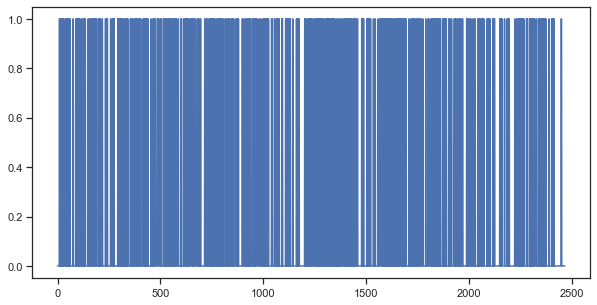

In [48]:
pa = PocketAlgorithm()
print("a:",X_train.dtype)
pa.train(X_train, y_train)

In [49]:
np.sign(pa.use(X_test))
X_test

w_pocket:  (7,)
shape of X:  (2466, 6)
shape of X1:  (2466, 6)


array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 2.0000000e-01,
        2.0000000e-01, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 2.2000000e+01, 0.0000000e+00,
        1.5000000e-02, 1.0000000e+01],
       [0.0000000e+00, 0.0000000e+00, 7.0000000e+00, 2.8571429e-02,
        3.4285714e-02, 2.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 6.0000000e+00, 8.3333333e-02,
        8.6666667e-02, 1.3000000e+01],
       [4.0000000e+00, 0.0000000e+00, 1.5000000e+01, 0.0000000e+00,
        2.1052632e-02, 1.1000000e+01],
       [0.0000000e+00, 0.0000000e+00, 3.0000000e+00, 0.0000000e+00,
        6.6666667e-02, 2.0000000e+00]])

w_pocket:  (7,)
shape of X:  (2466, 6)
shape of X1:  (2466, 6)


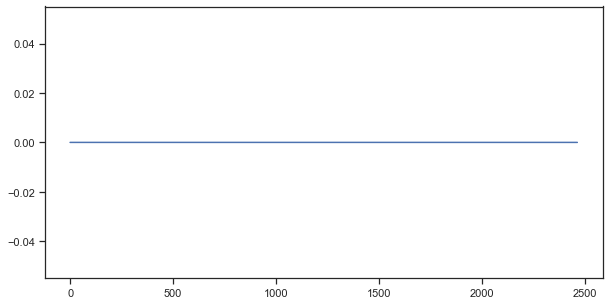

In [50]:
plt.plot(pa.use(X_test))

### C. Quadratic Discriminant Analysis (QDA)

A class named 'QDA' is created which takes parameters of our Classifier where tarining is to be performed. A constructer is used which initializes the value of weight which can be used afterwards when actual weights are generated. The mean and standard deviation are initialized to none at the beginning.

In the class of QDA, we take training data, mean, sigma and prior probability and calculates the discriminant values for different classes.

In the train function, we compare 4 parameters and calculate its value to get the best output.

In the use function, we are using the discriminant values and normaliztion of the input X is done with the weights to get the desired output.

In [109]:
def QDA(X, mu, sigma, prior):
        print("In")
        X = X.astype(float)
        print("sigma: ",sigma.shape)
        sigma_inv = np.linalg.pinv(sigma)
        diffv = X - mu
        return -0.5  * np.log(np.linalg.det(sigma)) \
                - 0.5 * np.sum(diffv @ sigma_inv * diffv, axis=1) \
                + np.log(prior)

In [127]:
class QDAclass(Classifier): 
    
    def __init__(self):
        Classifier.__init__(self)
        self.prior1 = None
        self.prior2 = None
        self.mu1 = None
        self.mu2 = None
        self.Sigma1 = None
        self.Sigma2 = None
        self.N1 = class_0.shape[0]
        self.N2 = class_1.shape[0]
        self.N = self.N1 + self.N2        
    
    def train(self, X):
        X = X.astype(float)
        self.means = np.mean(X, 0)
        self.stds = math.sqrt(np.mean(abs(X - X.mean())**2))
        Xs = (X - self.means) / self.stds
#         print(Xs)
#         Xs = Xs.astype(np.float32)
        self.mu1 = np.mean(Xs[:self.N1], 0)
#         print("mean1:",self.mu1)
        self.mu2 = np.mean(Xs[self.N1:], 0)
#         print("mean2:",self.mu2)

        self.Sigma1 = np.cov(Xs[:self.N1].T)
        self.Sigma2 = np.cov(Xs[self.N1:].T)

        self.prior1 = self.N1 / self.N
        self.prior2 = self.N2 / self.N

        
    def use(self, X):
        XtestS = (X-self.means)/self.stds
        print("mean1:",self.mu1)
        print("std1:", self.Sigma1)
        print("prior1:",self.prior1)
        print("mean2:",self.mu2)
        print("std2:", self.Sigma2)
        print("prior2:",self.prior2)
        d1 = QDA(XtestS, self.mu1, self.Sigma1, self.prior1)
        d2 = QDA(XtestS, self.mu2, self.Sigma2, self.prior2)
        df = pd.DataFrame({'d1':d1, 'd2':d2})
        pred=np.where(df['d1']>df['d2'],1,0)
        return pred
        
    

In [128]:
class_0 = []
class_1 = []

print("X_train: ",X_train.shape[0])
for i in range(0,X_train.shape[0]):
    if y_train[i] == 1:
        class_0.append((X_train[i]))
    else:
        class_1.append((X_train[i]))
class_0 = np.asarray(class_0)
print("Class 0:",class_0.shape)
class_1 = np.asarray(class_1)
print("Class 1:",class_1.shape)

train = np.concatenate((class_0, class_1), axis=0)

X_train:  9864
Class 0: (1414, 6)
Class 1: (8450, 6)


In [129]:
qda = QDAclass()
qda.train(train)
qda.use(X_test)

mean1: [ 0.04949435  0.01346473  0.60144457 -0.00088976 -0.00121328 -0.00397515]
std1: [[ 3.23571316e-02  4.83251976e-03  1.96853516e-01 -3.00773655e-06
  -1.64183262e-05  3.09402864e-04]
 [ 4.83251976e-03  5.56124712e-03  5.68854057e-02  9.38170998e-07
  -2.15421412e-06 -2.31740408e-04]
 [ 1.96853516e-01  5.68854057e-02  6.11736298e+00 -4.28281394e-05
  -3.35548391e-04 -1.89884294e-02]
 [-3.00773655e-06  9.38170998e-07 -4.28281394e-05  3.51235932e-07
   3.51980255e-07  1.12562245e-05]
 [-1.64183262e-05 -2.15421412e-06 -3.35548391e-04  3.51980255e-07
   6.87983194e-07  1.20065058e-05]
 [ 3.09402864e-04 -2.31740408e-04 -1.89884294e-02  1.12562245e-05
   1.20065058e-05  3.69734568e-02]]
prior1: 0.14334955393349555
mean2: [-0.00828225 -0.00225315 -0.1006441   0.00014889  0.00020303  0.00066519]
std2: [[ 2.55329084e-02  3.56517072e-03  1.40523252e-01 -9.72681911e-05
  -1.36976759e-04 -9.19361170e-04]
 [ 3.56517072e-03  3.50513088e-03  4.37150801e-02 -1.80992179e-05
  -2.54093389e-05 -3.095

array([0, 0, 0, ..., 0, 0, 0])

### D. Linear Discriminant Analysis (LDA)

A class named 'LDA' is created which takes parameters of our Classifier where tarining is to be performed. A constructer is used which initializes the value of weight which can be used afterwards when actual weights are generated. The mean and standard deviation are initialized to none or a value accordingly, at the beginning.

In the class of LDA, we take training data, mean, sigma and prior probability and calculates the discriminant values for different classes. It executes the same way as QDA does, it only differs for the case that in LDA all classes have the same covariance matrix.

In the train function, we compare 4 parameters and calculate its value to get the best output.

In the use function, we are using the discriminant values of two different classes and normaliztion of the input X is done with the weights to get the desired output. It checks instance with the maximum value and returns the predicted output.

In [95]:
def LDA(X, mu, sigma, prior):
    X =X.astype(float)
    sigma_inv = np.linalg.inv(sigma)
    return np.sum((X @ sigma_inv) * mu \
                - 0.5 * (mu @ sigma_inv) * mu, axis=1) \
                + np.log(prior)

In [96]:
class_0 = []
class_1 = []
class_0_label = []
class_1_label = []
a = []
v = []
print("X_train: ",X_train.shape[0])
for i in range(0,X_train.shape[0]):
    if y_train[i] == 1:
        class_0.append((X_train[i]))
        class_0_label.append((y_train[i]))
    else:
        class_1.append((X_train[i]))
        class_1_label.append((y_train[i]))
        
class_0 = np.asarray(class_0)
print("Class 0:",class_0.shape)
class_1 = np.asarray(class_1)
print("Class 1:",class_1.shape)

train = np.concatenate((class_0, class_1), axis=0)

X_train:  9864
Class 0: (1414, 6)
Class 1: (8450, 6)


In [121]:
class LDAClass(Classifier): 
    
    def __init__(self):
        Classifier.__init__(self)
        self.prior1 = None
        self.prior2 = None
        self.mu1 = None
        self.mu2 = None
        self.Sigma = None        
        self.N1 = class_0.shape[0]
        self.N2 = class_1.shape[0]
        self.N = self.N1 + self.N2
        
    def train(self, X):
        X = X.astype(float)
        self.means = np.mean(X, 0)
        self.stds = math.sqrt(np.mean(abs(X - X.mean())**2))
        Xs = (X - self.means) / self.stds

        self.mu1 = np.mean(Xs[:self.N1], 0)
        print("mu: ",self.mu1)
        self.mu2 = np.mean(Xs[self.N1:], 0)
        print("mu: ",self.mu2)


        self.Sigma = np.cov(Xs.T)
        print("sigma: ",self.Sigma)

        self.prior1 = self.N1 / self.N
        print("sigma: ",self.prior1)

        self.prior2 = self.N2 / self.N
        print("sigma: ",self.prior2)

        
    def use(self,X):
        XtestS = (X - self.means)/self.stds
        self.d1 = LDA(XtestS, self.mu1, self.Sigma, self.prior1)
        self.d2 = LDA(XtestS, self.mu2, self.Sigma, self.prior2)       
        df = pd.DataFrame({'d1':self.d1, 'd2':self.d2})
        pred=np.where(df['d1']>df['d2'],0,1)
        print(pred[2000:3000])
        print(self.d1.shape,self.d2.shape)
        return pred

In [98]:
# lda = LDAClass()
# lda.train(train)
# d1,d2=lda.use(X_test)

mu:  [ 0.04949435  0.01346473  0.60144457 -0.00088976 -0.00121328 -0.00397515]
mu:  [-0.00828225 -0.00225315 -0.1006441   0.00014889  0.00020303  0.00066519]
sigma:  [[ 2.69179424e-02  3.85790265e-03  1.53560849e-01 -9.11243242e-05
  -1.29741092e-04 -7.76158448e-04]
 [ 3.85790265e-03  3.82968140e-03  4.69527471e-02 -1.73750130e-05
  -2.48091621e-05 -3.07327631e-04]
 [ 1.53560849e-01  4.69527471e-02  4.25292390e+00 -1.02189155e-03
  -1.47206141e-03 -4.78856550e-03]
 [-9.11243242e-05 -1.73750130e-05 -1.02189155e-03  5.97491323e-06
   5.46964803e-06  3.62217464e-05]
 [-1.29741092e-04 -2.48091621e-05 -1.47206141e-03  5.46964803e-06
   6.01981389e-06  3.59066341e-05]
 [-7.76158448e-04 -3.07327631e-04 -4.78856550e-03  3.62217464e-05
   3.59066341e-05  3.80658495e-02]]
sigma:  0.14334955393349555
sigma:  0.8566504460665044
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1

### E. Logistic Regression

A class named 'LogisticRegression' is created which takes parameters of our Classifier where training is to be performed. A constructer is used which initializes the value of weight which can be used afterwards when actual weights are generated. A softmax function is used here alog with train and use.

In the softmax function, we use the equation
$$
g_k(x) = P(T=k \mid x) = \frac{e^{\kappa_k}}{\sum_{c=1}^K e^{\kappa_c}}
$$
his function is called as **softmax function**. This generalizes the logistic sigmoid fuunction and the derivatives are given by itself

$$
\frac{\partial g_k}{\partial y_j}  = g_k (I_{kj} - g_j).
$$

In the train function, we normalize, calculate weight, add the bais term in order to get the best output.

In the use function, we are classifying of the input X with the help of weights and softmax function to get the desired output. 

In [71]:
class LogisticRegression(Classifier):

    def __init__(self):
        Classifier.__init__(self)
        self.w = np.random.rand(X_train.shape[1]+1, 2)
   
    def softmax(self,z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        f = np.exp(z) 
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))

    # for linear fx
    def g(self,X, w):
        return self.softmax(X @ w) 

    def train(self, X, T):
        X = X.astype(float)
        X = self.normalize(X)

        niter = 10
        alpha = 0.0001
        X1 = self.add_ones(X)
        for step in range(niter):
            ys = self.g(X1, self.w)
            self.w += alpha * X1.T @ (T - ys)
       
        return self.w
   
    def use(self, X):
        X = X.astype(float)
        X = self.normalize(X)
        X1 = self.add_ones(X)
        y = self.g(X1, self.w)
        return y

In [72]:
lr = LogisticRegression()
lr.train(X_train,y_train)
lr.use(X_test)

array([[0.51639578, 0.48360422],
       [0.50808586, 0.49191414],
       [0.51804451, 0.48195549],
       ...,
       [0.51737504, 0.48262496],
       [0.49542725, 0.50457275],
       [0.45841126, 0.54158874]])

Confusion Matrix: 
 [[1425 1041]
 [   0    0]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.58      0.73      2466
           1       0.00      0.00      0.00         0

    accuracy                           0.58      2466
   macro avg       0.50      0.29      0.37      2466
weighted avg       1.00      0.58      0.73      2466

Accuracy:  57.785888077858885 %


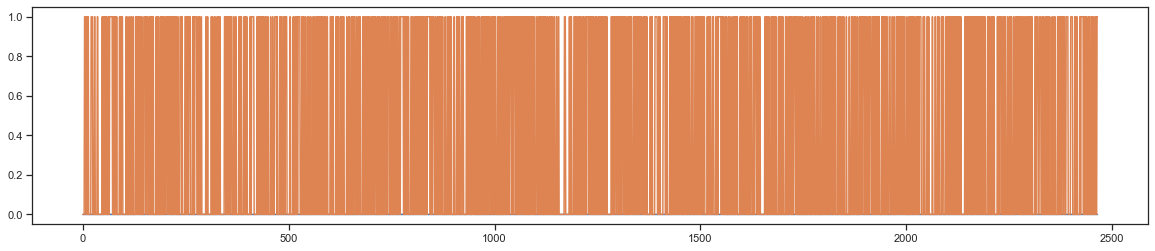

In [73]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Yl = np.argmax(lr.use(X_test), 1)
Tl = np.argmax(y_test, 1)

plt.figure(figsize = (20,4))
plt.plot(Tl)
plt.plot(Yl)
cm = confusion_matrix(Tl, Yl)
print("Confusion Matrix: \n", cm)
cr = classification_report(Tl, Yl)
print("Classification Report: \n", cr)
print("Accuracy: ", 100 - np.mean(np.abs(Tl - Yl)) * 100, "%")

# IV. Experiments

Application of the classifiers on the data and its results are discussed below along with the description of codes for experiments. 

### Evaluation metrics

Evaluation metrics is the representation of the main classification metrics on a per-class basis as shown by the classification report. It tells about the classifier behavior over global accuracy which can mask functional weaknesses in one class of a multiclass problem.  



### Train and test accuracy

When you apply the model on the training data, you get Training accuracy, while testing accuracy is the accuracy for the testing data. In the current scenario we can observe that in almost all the cases, the training accuracy is higher than the testing accuracy for our classification models.




### Plots for Results:

### Pocket Algorithm

In [75]:
p = PocketAlgorithm()
p.train(X_train,y_train)
plt.clf()

w_pocket (7,) (7,)
Shape of N:  9864
i:  0
k: 4769
k: 1364
k: 6744
k: 9835
k: 592
k: 2199
k: 1837
k: 7807
k: 9465
k: 2295
k: 227
k: 9141
k: 7960
k: 7337
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6107
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8813
k: 8288
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5168
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 504
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9027
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6178
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9229
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3690
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5773
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8744
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7339
k: 2959
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5591
y:yp [-1.  1. -1. ... -1.  1

k: 3870
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7346
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4623
k: 3904
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3857
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8006
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6938
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7474
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8388
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5826
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 485
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4035
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4280
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7838
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8104
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3182
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ..

k: 657
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7398
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6056
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 920
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9679
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5623
k: 9809
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 102
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3832
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8748
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7123
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8971
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6246
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2173
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8588
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7752
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 

k: 7298
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 967
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 29
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9623
k: 4304
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1318
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5786
k: 913
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8735
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1358
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7493
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6614
k: 899
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2699
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1461
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9194
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3225
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9356
y:yp [-1.  1. -1. ... -1.  1.  1.] 

k: 2256
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9526
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2746
k: 2571
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9568
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6081
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5684
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3995
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8062
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3938
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2428
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8024
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1210
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 23
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4982
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6853
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ...

k: 395
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8246
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6547
k: 7774
k: 4609
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4367
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 155
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8477
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6768
k: 1066
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5390
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4521
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3393
k: 8403
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1661
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9259
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2032
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1717
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2729
y:yp [-1. -1. -1. ... -1

k: 9062
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6324
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2267
k: 1033
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2777
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3028
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 471
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2423
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8216
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8330
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6484
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2052
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8368
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 966
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2876
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6875
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ...

k: 6286
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3187
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9399
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9369
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7386
k: 9037
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9000
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2058
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9627
k: 202
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4715
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1122
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3230
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5360
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1898
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1363
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7585
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 

k: 3569
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2788
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1599
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3980
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 993
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7442
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2744
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9318
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7245
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7547
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7998
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2949
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3668
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8671
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4534
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 

k: 8066
k: 785
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7246
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8072
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5261
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6750
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7527
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5949
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5053
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 721
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 574
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8132
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4578
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4983
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3518
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6053
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 

k: 1817
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4564
k: 5003
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 851
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3044
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8113
k: 8719
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7905
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1906
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8341
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8356
k: 413
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9497
k: 8393
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1145
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 610
k: 5600
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8436
k: 476
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 248
k: 1570
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2896
y:y

k: 7531
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8614
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8527
k: 5487
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4649
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8682
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6485
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1412
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7701
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9644
k: 6891
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5694
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9749
k: 7865
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1387
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 569
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 106
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 236
y:yp [-1. -1. -1. ... -1.  1.  1.

k: 9090
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6707
k: 3516
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 173
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 233
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5231
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4626
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1118
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9137
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1940
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3413
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 776
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2990
k: 8653
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8925
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6944
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1922
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0.

k: 2968
k: 2298
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2750
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8857
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7129
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4079
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4317
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1915
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 704
k: 5851
k: 4764
k: 9042
k: 7254
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7955
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5033
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1227
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2132
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8389
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7091
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2008
y:yp [-1. -1. -

k: 3123
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3292
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6868
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 434
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2286
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1974
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8787
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9105
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9362
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6023
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5953
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9589
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2368
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 879
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7484
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0

k: 8908
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6233
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9014
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9192
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 50
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8129
k: 5495
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3911
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6169
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6641
k: 6725
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2935
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1519
k: 5650
k: 297
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4024
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3161
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3838
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5928
y:yp [-1. -1. -1. ... -1.

k: 1080
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1872
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9618
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1893
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3170
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2238
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5718
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6771
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3618
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5094
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7355
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 314
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7691
k: 8058
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4524
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1927
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ..

k: 2500
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1841
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3030
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3437
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6613
k: 3551
k: 3747
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4495
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 203
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2031
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2493
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 460
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9383
k: 7592
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 771
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6502
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7434
y:yp [-1. -1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5156
y:yp [-1. -1. -1. ... -1.  1.  1.

k: 516
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9307
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2056
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1900
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9041
k: 6691
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1476
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4059
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6019
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7365
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4702
k: 1217
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 878
k: 9791
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2601
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5805
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8956
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2650
y:yp [-1.  1. -1. ... -1.  1.  1

k: 9473
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3830
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4565
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3600
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 921
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 689
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7813
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5497
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7242
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2431
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 857
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7937
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7458
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2895
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6208
k: 7662
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 

k: 3815
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2369
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7649
k: 6110
k: 1467
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6612
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2274
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2798
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3027
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3730
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8694
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 624
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8714
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2482
k: 5665
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6941
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6532
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9745
k: 326
y:yp [-1.  1. -1. ... -1

k: 5449
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9606
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8294
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5567
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9068
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 220
k: 4497
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1163
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 371
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 449
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4637
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6261
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6651
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1532
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7322
k: 8811
k: 3070
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 644
y:yp [-1.  1. -1. ... -1.  1.  1.]

k: 5896
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1669
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5544
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3257
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1155
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7154
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3286
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4254
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5840
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8489
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3071
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1326
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7902
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6823
k: 1678
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7916
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. .

k: 3945
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8983
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1830
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1084
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3570
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4209
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5935
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6347
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4932
k: 201
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 894
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8562
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 206
k: 6817
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1248
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9776
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7596
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0.

k: 3641
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1851
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1801
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1372
k: 8525
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9752
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6608
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4188
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 369
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1582
k: 7069
k: 9387
k: 2511
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3891
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4246
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4249
k: 1492
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7050
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7272
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8083
y:yp [-1.  1. -

k: 7939
k: 6076
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1613
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4973
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6577
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3167
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7604
k: 3515
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7885
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3096
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7515
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7107
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4160
k: 386
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3147
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2485
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1440
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4264
y:yp [-1.  1. -1. ... -1.  1.  

k: 3784
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1408
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7064
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7490
k: 3146
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2395
k: 1053
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4128
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4800
k: 3655
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7867
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3290
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6699
k: 8304
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8684
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5092
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4538
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4176
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9472
y:yp [-1.  1. -1. ... 

k: 2258
k: 8679
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9352
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2924
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1544
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1591
k: 4566
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6424
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5850
k: 1220
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1181
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3264
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 457
k: 291
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7610
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3057
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3955
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 601
k: 3411
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1401
y:yp [-1.  1. -1.

k: 7753
k: 3075
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9615
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4406
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5486
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6720
k: 6798
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7089
k: 4408
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 664
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6793
k: 9681
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1142
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3139
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8706
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 877
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9404
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8754
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3535
y:yp [-1.  1. -1. ... -1

k: 7281
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 97
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4897
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7621
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 777
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5089
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 533
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2501
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3861
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 863
k: 1385
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6046
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2956
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 640
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5173
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3338
k: 4011
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0.

k: 1455
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6196
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7657
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2801
k: 6152
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8918
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2836
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5197
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4429
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3789
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 441
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8231
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6772
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7791
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7851
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1562
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ..

k: 1797
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6180
k: 8767
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6066
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1212
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6555
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8723
k: 2306
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8942
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1863
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1232
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6573
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8206
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9394
k: 5152
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9567
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3304
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6973
y:yp [-1.  1. -1. ... -1.  1. 

k: 9840
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3445
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8215
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2140
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3999
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 725
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1185
k: 6663
k: 7303
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8581
k: 1653
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3396
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1875
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2082
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8295
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8654
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6420
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6776
y:yp [-1.  1. -1. ... -1.  1.  

k: 9058
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1662
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2372
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7510
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3032
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2976
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4840
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8927
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2326
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6672
k: 2262
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4065
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6679
k: 2985
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3118
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2180
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 803
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 

k: 5999
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8162
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3873
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5025
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6618
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3824
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4293
k: 5371
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7160
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 176
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9783
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5088
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5054
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2374
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4867
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8691
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ..

k: 4164
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7769
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2779
k: 9604
k: 7709
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4791
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3217
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4099
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6086
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1488
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5274
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1067
k: 9819
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1274
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 87
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5146
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3454
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8708
y:yp [-1.  1. -1. ... -1.  1.  1

k: 7842
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9479
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2022
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7827
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2473
k: 196
k: 5448
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5737
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8710
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4080
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2281
k: 8598
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6085
k: 1949
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4051
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6880
k: 26
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9821
k: 4109
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 753
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8401
k: 5316
y:

k: 5663
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4906
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7666
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3248
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 654
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9450
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 643
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9480
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6709
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9060
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2803
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3449
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7532
k: 5047
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8658
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 190
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 

k: 5960
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6199
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8266
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5612
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4824
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 619
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3366
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8603
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2954
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1543
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3239
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6730
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6475
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4265
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1253
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 

k: 7568
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7486
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1494
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5517
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3110
k: 2472
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2205
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3046
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4551
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5427
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 144
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2781
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5669
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2253
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5072
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4438
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ..

k: 9099
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4582
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6569
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6357
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8759
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3330
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1947
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4886
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2480
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7584
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1075
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9829
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 586
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 110
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4238
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0

k: 1119
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3152
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2520
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6294
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 389
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8319
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1583
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 557
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2438
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4073
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7697
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 252
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 652
k: 505
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1201
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 633
k: 5411
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0.

k: 3702
k: 1317
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8796
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5442
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9367
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 235
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3959
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4939
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3341
k: 4270
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 14
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3942
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3434
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1713
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3486
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1020
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8855
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0.

k: 8466
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4253
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2708
k: 6247
k: 4142
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6819
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6700
k: 2325
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2629
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3766
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6089
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8788
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8628
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6900
k: 1919
k: 56
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8301
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1890
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8972
k: 4371
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9280
k: 1602


k: 4946
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6476
k: 8254
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2709
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3073
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5394
k: 8746
k: 3312
k: 6014
k: 9328
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9556
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1301
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1923
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5009
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1814
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2675
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5996
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 982
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8452
k: 2810
k: 4413
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1200

k: 2203
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 402
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9422
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5630
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8749
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3596
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8109
k: 2579
k: 4013
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5738
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6184
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3630
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1340
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3631
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5696
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6957
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 790
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0

k: 2839
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 870
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1135
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4189
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 433
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2998
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4480
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6156
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8260
k: 824
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1899
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 881
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7696
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4368
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7267
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1859
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0

k: 7216
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 0
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 677
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6596
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9429
k: 3278
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5771
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8711
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3564
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3854
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5559
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2283
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 531
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7615
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5455
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4911
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0.

k: 3985
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2641
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1605
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8564
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5000
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8554
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 764
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 587
k: 649
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4151
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2902
k: 3511
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3180
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6029
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8503
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3876
k: 2940
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3343
y:yp [-1.  1. -1. ... -1.  1.  1.

k: 6729
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2644
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5076
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5715
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 827
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3352
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7787
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2832
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7679
k: 497
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4325
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8201
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4440
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8482
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9281
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2707
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ...

k: 8044
k: 2232
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 387
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3597
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2720
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5154
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4667
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1892
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 802
k: 8124
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2085
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9375
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1161
k: 5782
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7862
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4516
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5271
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8064
y:yp [-1.  1. -1. ... -1.  1.  1

k: 6392
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4541
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8383
k: 3989
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3346
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4229
k: 7078
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6314
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3810
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3055
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 862
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2447
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 120
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9441
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6992
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9572
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1644
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0

k: 5265
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 635
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5244
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8920
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6250
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8445
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2790
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5855
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3157
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7820
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3796
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7949
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2252
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8540
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5225
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 

k: 1664
k: 4235
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9657
k: 5040
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5349
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4817
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5554
k: 8473
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8040
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2654
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4591
k: 8670
k: 5482
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9854
k: 8159
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2357
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6469
k: 3164
k: 4259
k: 8837
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3469
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9286
k: 8932
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7393
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0.

k: 6068
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 424
k: 9285
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3280
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1788
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4689
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1177
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9095
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8896
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7548
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9414
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1021
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7966
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2414
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7525
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8555
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ..

k: 6280
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3946
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6464
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8471
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6840
k: 9069
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1541
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9571
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4114
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3800
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7984
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3713
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1499
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4970
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4415
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2158
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. .

k: 3287
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3197
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 687
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9716
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7284
k: 5102
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5428
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 931
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2577
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7588
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4322
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8848
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5363
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1229
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5263
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6003
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ...

k: 8538
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4830
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2609
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7084
k: 2939
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7512
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9213
k: 6638
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9447
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3759
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8156
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8437
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6914
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3181
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4341
k: 5868
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8167
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7872
k: 6025
k: 4610
y:yp [-1.  1. 

k: 1784
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5383
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8579
k: 6779
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6385
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1620
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2612
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3326
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9210
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8842
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5019
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7577
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8601
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5294
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3533
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 774
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ..

k: 2009
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3947
k: 1182
k: 499
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1676
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8528
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3623
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7048
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7891
k: 5672
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1131
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2185
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 773
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8367
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7134
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7545
k: 3351
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6539
k: 4528
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1434
y:yp [-1.  1. -1

k: 9555
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5350
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6274
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 756
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7899
k: 7673
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9707
k: 157
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1310
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4084
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5056
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4221
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9193
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7476
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3090
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1535
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7785
k: 1250
y:yp [-1.  1. -1. ... -1.  1.  1

k: 9347
k: 2859
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6067
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1977
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7097
k: 7382
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6063
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6870
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6304
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2416
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7172
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 653
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5861
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3492
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6991
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1780
k: 9810
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1272
y:yp [-1.  1. -1. ... -1.  1.  

k: 7353
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1748
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7557
k: 9778
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3080
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8251
k: 5977
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9859
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 589
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7122
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7908
k: 8639
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8803
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2991
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2651
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6684
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 442
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5142
k: 416
k: 6625
y:yp [-1.  1. -1.

k: 5291
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9208
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9710
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5654
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2980
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1355
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7429
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7569
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2528
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2578
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3921
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2681
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7566
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2020
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1587
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0.

k: 5379
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 153
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8025
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3317
k: 9102
k: 4071
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2014
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2893
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7226
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7042
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2382
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5214
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2204
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2319
k: 2950
k: 8998
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4050
k: 3905
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1417
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9230
y:yp [-1.  1. -

k: 64
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2172
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1646
k: 7667
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4156
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5618
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3311
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7982
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7435
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6327
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4122
k: 5792
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4018
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4001
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4025
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 285
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5690
k: 3255
y:yp [-1.  1. -1. ... -1.  1.  1.

k: 7037
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7654
k: 6658
k: 1809
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2076
k: 5593
k: 755
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7830
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9704
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1855
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5424
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3802
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4594
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1888
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 904
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3081
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4820
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7364
k: 6007
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4431
k: 4346
y:yp [-1

k: 5511
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5108
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4005
k: 1208
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1103
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8699
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3761
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4112
k: 4461
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8899
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5012
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 3340
k: 6080
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4910
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7893
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8290
k: 5858
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9558
k: 4332
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9353
y:yp [-1.  1. 

k: 4883
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1697
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2120
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1302
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 37
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7997
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1574
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2740
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8102
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1673
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 562
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5466
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2191
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6917
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 602
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]

k: 4741
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5099
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 1429
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7127
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7177
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6335
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 9235
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 6207
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 2254
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 4576
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5721
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 5346
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 770
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 7094
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 0.]
k: 8166
y:yp [-1.  1. -1. ... -1.  1.  1.] [0. 0. 0. ... 0. 0. 

<Figure size 720x360 with 0 Axes>

In [76]:
pp = pa.use(X_test)
pp = np.sign(pp)
for i in range (pp.shape[0]):
    if pp[i] == -1 :
        pp[i] =0
        
pp_train = pa.use(X_train)
pp_train = np.sign(pp_train)
for i in range (pp_train.shape[0]):
    if pp_train[i] == -1 :
        pp_train[i] =0        
        


w_pocket:  (7,)
shape of X:  (2466, 6)
shape of X1:  (2466, 6)
w_pocket:  (7,)
shape of X:  (9864, 6)
shape of X1:  (9864, 6)


Matrix :  [[160   0]
 [ 40   0]]
Report :                precision    recall  f1-score   support

           0       0.80      1.00      0.89       160
           1       0.00      0.00      0.00        40

    accuracy                           0.80       200
   macro avg       0.40      0.50      0.44       200
weighted avg       0.64      0.80      0.71       200



C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Train Accuracy :  85.66504460665044 %
Test Accuracy :  79.96755879967559 %


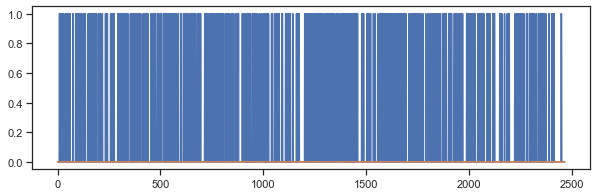

In [77]:
plt.figure(figsize = (10,3))
plt.plot(y_test)
plt.plot(pp)
cm = confusion_matrix(y_test[:200], pp[:200])
print("Matrix : ",cm)
cr = classification_report (y_test[:200],pp[:200])
print("Report : ",cr)

print("Train Accuracy : ",100 - np.mean(np.abs(y_train - pp_train)) * 100, "%")
print("Test Accuracy : ", 100 - np.mean(np.abs(y_test - pp)) * 100, "%")

### Quadratic Discriminant Analysis (QDA)

In [130]:
class_0 = []
class_1 = []

print("Input train: ",X_train.dtype)
for i in range(0,X_train.shape[0]):
    if y_train[i] == 1:
        class_0.append((X_train[i]))
    else:
        class_1.append((X_train[i]))
class_0 = np.asarray(class_0)
print("Class 0:",class_0.shape)
class_1 = np.asarray(class_1)
print("Class 1:",class_1.shape)

train = np.concatenate((class_0, class_1), axis=0)

Input train:  float64
Class 0: (1414, 6)
Class 1: (8450, 6)


In [131]:
qda = QDAclass()
qda.train(train)
qda_p = qda.use(X_test)
qda_p_train = qda.use(X_train)


mean1: [ 0.04949435  0.01346473  0.60144457 -0.00088976 -0.00121328 -0.00397515]
std1: [[ 3.23571316e-02  4.83251976e-03  1.96853516e-01 -3.00773655e-06
  -1.64183262e-05  3.09402864e-04]
 [ 4.83251976e-03  5.56124712e-03  5.68854057e-02  9.38170998e-07
  -2.15421412e-06 -2.31740408e-04]
 [ 1.96853516e-01  5.68854057e-02  6.11736298e+00 -4.28281394e-05
  -3.35548391e-04 -1.89884294e-02]
 [-3.00773655e-06  9.38170998e-07 -4.28281394e-05  3.51235932e-07
   3.51980255e-07  1.12562245e-05]
 [-1.64183262e-05 -2.15421412e-06 -3.35548391e-04  3.51980255e-07
   6.87983194e-07  1.20065058e-05]
 [ 3.09402864e-04 -2.31740408e-04 -1.89884294e-02  1.12562245e-05
   1.20065058e-05  3.69734568e-02]]
prior1: 0.14334955393349555
mean2: [-0.00828225 -0.00225315 -0.1006441   0.00014889  0.00020303  0.00066519]
std2: [[ 2.55329084e-02  3.56517072e-03  1.40523252e-01 -9.72681911e-05
  -1.36976759e-04 -9.19361170e-04]
 [ 3.56517072e-03  3.50513088e-03  4.37150801e-02 -1.80992179e-05
  -2.54093389e-05 -3.095

 Matrix:  [[1481  491]
 [ 253  241]]
 Report:                precision    recall  f1-score   support

           0       0.85      0.75      0.80      1972
           1       0.33      0.49      0.39       494

    accuracy                           0.70      2466
   macro avg       0.59      0.62      0.60      2466
weighted avg       0.75      0.70      0.72      2466

Testing Accuracy:  62.17659931762974 %
Training Accuracy:  70.32010854515161 %


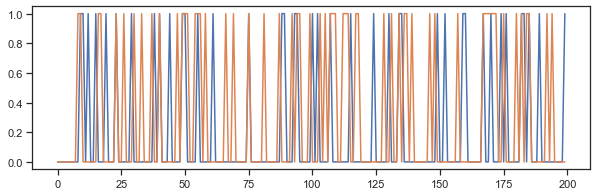

In [132]:
plt.figure(figsize = (10,3))
plt.plot(y_test[:200])
plt.plot(qda_p[:200])
cm = confusion_matrix(y_test, qda_p)
print(" Matrix: ", cm)
cr = classification_report(y_test, qda_p)
print(" Report: ", cr)
print("Testing Accuracy: ", 100 - np.mean(np.abs(y_test - qda_p)) * 100, "%")
print("Training Accuracy: ", 100 - np.mean(np.abs(y_train - qda_p_train)) * 100, "%")

### Linear Discriminant Analysis (LDA)

In [122]:
class_0 = []
class_1 = []

for i in range(0,X_train.shape[0]):
    if y_train[i] == 1:
        class_0.append((X_train[i]))
    else:
        class_1.append((X_train[i]))
        
class_0 = np.asarray(class_0)

class_1 = np.asarray(class_1)

train = np.concatenate((class_0, class_1), axis=0)

In [123]:
lda = LDAClass()
lda.train(train)
lda_p =lda.use(X_test)
lda_p_train =lda.use(X_train)

mu:  [ 0.04949435  0.01346473  0.60144457 -0.00088976 -0.00121328 -0.00397515]
mu:  [-0.00828225 -0.00225315 -0.1006441   0.00014889  0.00020303  0.00066519]
sigma:  [[ 2.69179424e-02  3.85790265e-03  1.53560849e-01 -9.11243242e-05
  -1.29741092e-04 -7.76158448e-04]
 [ 3.85790265e-03  3.82968140e-03  4.69527471e-02 -1.73750130e-05
  -2.48091621e-05 -3.07327631e-04]
 [ 1.53560849e-01  4.69527471e-02  4.25292390e+00 -1.02189155e-03
  -1.47206141e-03 -4.78856550e-03]
 [-9.11243242e-05 -1.73750130e-05 -1.02189155e-03  5.97491323e-06
   5.46964803e-06  3.62217464e-05]
 [-1.29741092e-04 -2.48091621e-05 -1.47206141e-03  5.46964803e-06
   6.01981389e-06  3.59066341e-05]
 [-7.76158448e-04 -3.07327631e-04 -4.78856550e-03  3.62217464e-05
   3.59066341e-05  3.80658495e-02]]
sigma:  0.14334955393349555
sigma:  0.8566504460665044
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1

Matrix:  [[   0 1972]
 [   2  492]]
 Report:                precision    recall  f1-score   support

           0       0.00      0.00      0.00      1972
           1       0.20      1.00      0.33       494

    accuracy                           0.20      2466
   macro avg       0.10      0.50      0.17      2466
weighted avg       0.04      0.20      0.07      2466

Test Accuracy:  20.081050379237112 %
Train Accuracy:  14.378343525474435 %


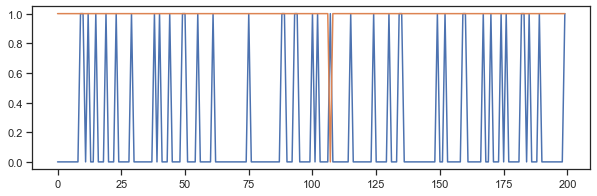

In [126]:
plt.figure(figsize = (10,3))
plt.plot(y_test[:200])
plt.plot(lda_p[:200])
cm = confusion_matrix(y_test, lda_p)
print("Matrix: ", cm)
cr = classification_report(y_test, lda_p)
print(" Report: ", cr)
print("Test Accuracy: ", 100 - np.mean(np.abs(y_test - lda_p)) * 100, "%")
print("Train Accuracy: ", 100 - np.mean(np.abs(y_train - lda_p_train)) * 100, "%")

###  Logistic Regression

In [92]:
lr = LogisticRegression()
lr.train(X_train,y_train)
logistic_prediction = lr.use(X_test)
logistic_prediction = np.argmax(logistic_prediction, 1)
logistic_prediction_train = lr.use(X_train)
logistic_prediction_train = np.argmax(logistic_prediction_train, 1)

Confusion Matrix: 
 [[1120  852]
 [ 327  167]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.57      0.66      1972
           1       0.16      0.34      0.22       494

    accuracy                           0.52      2466
   macro avg       0.47      0.45      0.44      2466
weighted avg       0.65      0.52      0.57      2466

Testing Accuracy:  55.201182143658215 %
Training Accuracy:  56.913175718564034 %


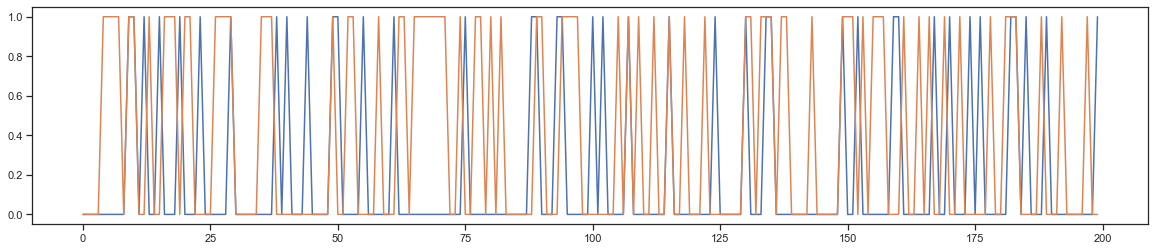

In [93]:
plt.figure(figsize = (20,4))
plt.plot(y_test[:200])
plt.plot(logistic_prediction[:200])
cm = confusion_matrix(y_test,logistic_prediction)
print("Confusion Matrix: \n", cm)

cr = classification_report(y_test,logistic_prediction)
print("\nClassification Report: \n", cr)
print("Testing Accuracy: ", 100 - np.mean(np.abs(y_test - logistic_prediction)) * 100, "%")
print("Training Accuracy: ", 100 - np.mean(np.abs(y_train - logistic_prediction_train)) * 100, "%")

### Classification Model Comparision

If we compare all the four classification algorithms such as Pocket Algorithm, Quadratic Discriminant Analysis (QDA), Linear Discriminant Analysis (LDA) and Logistic Regression. We have seen how different algorithms perform differently to classify the same data set. We considered the accuracy and confusion matrix to check how each algorithm performs for the given dataset. 

From the results we can infer that pocket algorithm takes comparatively longer time for execution on large datasets .

Also, comparing QDA and LDA, we know that QDA uses two variance matrix while calculating and generating the output where as LDA uses the same for all the classes.

We  can also consider the problem of overfitting in logistic regression as compared to LDA. 

On the given Dataset, QDA performs the best in comparision to all as it has higher accuracy and it does not have any over fitting issues. Thus the best output is generated for QDA algorithm in this classification problem.

<br/>

# Conclusions

The Assignment for Classification had so many learnings from it. It had made clear understanding of how classification models and algorithms work in supervised learning. Apart from the theoratical knowledge on how the algorithms and formulas are designed, a proper implementation knowledge of the models has been gained. Choosing the appropriate model for appropriate data set has been considered like for large data using QDA is better than pocket algorithm as it takes longer execution time. 

Right from plotting the raw data to prepossing it, we can find the changes and accuracy in the data once it is cleaned. Removing null values, dimentionality reduction, feature scaling, label encoding and all plays an important role in the processing of the data and the outcomes generated from it.

we considered mainly 4 different algorithms to solve the classification problem like Pocket Algorithm, Quadratic Discriminant Analysis (QDA), Linear Discriminant Analysis (LDA) and Logistic Regression.

Using these four classification algorithms, we can check the performance and determine the efficiency of each algorithm and also compare it's performance with the other. 
We also understood and used the classification measures like Accuracy, Confusion Matrix, Precision, Recall, Specificity and so on to measure the accuracy and precision of the classification model.

# References

1. Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018)

2. “Notebook on Nbviewer.” Jupyter Notebook Viewer, https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-Linear%20Classification.ipynb

2. “Notebook on Nbviewer.” Jupyter Notebook Viewer, https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-Classification.ipynb

2. “Creating Annotated Heatmaps.” Creating Annotated Heatmaps - Matplotlib 3.1.1 Documentation, https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_annotated_heatmap.html.

3. “Seaborn.pairplot.” Seaborn.pairplot - Seaborn 0.9.0 Documentation, https://seaborn.pydata.org/generated/seaborn.pairplot.html.

4. “Seaborn.distplot.” Seaborn.distplot - Seaborn 0.9.0 Documentation, https://seaborn.pydata.org/generated/seaborn.distplot.html.

5. “Seaborn.barplot.” Seaborn.barplot - Seaborn 0.9.0 Documentation, https://seaborn.pydata.org/generated/seaborn.barplot.html.


## Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes.

To help our TA's grading, please make an explicit section for each grading criteria. 

** Note: this is a WRITING assignment. Proper writing is REQUIRED. Comments are not considered as writing. ** 



points | | description
--|--|:--
5 | Overview| states the objective and the approach 
15 | Data | 
 | 5| description 
 | 5| plots for understanding or analysis 
 | 5| preliminary observation 
25 | Methods | 
 |10| Summary of Classification models
 | 5| Explanation of codes
 |10| Pocket, LDA, QDA, Logistic Regression
40 | Experiments 
| 5| Discussion about evaluation metrics
| 5| Discussion about train and test accuracies
|20| plots for results (5 for each algorithm)
|10| Discussions about classification model comparison
5 | |Conclusions 
5 | |References
5 | |Grammar and spelling error (Proofread please)